


# Visualização de dados 

**OBJETIVO**

🎯 Criar uma visualização de dados usando python









# Sobre o conjunto de Dados 

O conjunto de dados contém dados anuais sobre o fluxo de imigrntes internacionais registrado pelo país destino. Os dados apresentam entradas e saídas de acordo com o local de nascimento , nacionalidade ou local de residência anterior/próxima . A versão atual apresenta dados referente a 45 países .

**Nesse projeto irei me concentrar nos dados da imigração Canadense**

 Link do Dataset :  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx



In [ ]:
# Instalando um módulo para leitura de excel 
!mamba install openpyxl==3.0.9 -y

/bin/bash: mamba: command not found


In [ ]:
#!pip3 install folium==0.5.0

In [ ]:
#Carregando os pacotes necessários
from google.colab import drive
drive.mount('/content/drive')
import numpy as np  
import pandas as pd 
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.2.2


**Baixando e importando o conjunto de dados usando o read excel () do pandas**

In [ ]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Dados lidos em um dataframe do pandas!')

Dados lidos em um dataframe do pandas!


In [ ]:
#Visualizando as primeiras 10 linhas 
df_can.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [ ]:
#Visualizando as 10 últimas linhas 
df_can.tail(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
185,Immigrants,Foreigners,United States of America,905,Northern America,905,Northern America,901,Developed regions,9378,...,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501
186,Immigrants,Foreigners,Uruguay,904,Latin America and the Caribbean,931,South America,902,Developing regions,128,...,130,217,175,147,160,99,93,81,47,58
187,Immigrants,Foreigners,Uzbekistan,935,Asia,5500,Central Asia,902,Developing regions,0,...,175,330,262,284,215,288,289,162,235,167
188,Immigrants,Foreigners,Vanuatu,909,Oceania,928,Melanesia,902,Developing regions,0,...,1,1,1,0,0,1,0,0,0,0
189,Immigrants,Foreigners,Venezuela (Bolivarian Republic of),904,Latin America and the Caribbean,931,South America,902,Developing regions,103,...,1224,1211,1192,1335,1239,1353,998,1452,1373,1022
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [ ]:
#Resumo do dataframe
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [ ]:
# tamanho do dataframe (linhas , colunas)
df_can.shape   

(195, 43)

# Limpando o dataframe

In [ ]:
#Checando se há valores nulos 
df_can.isnull().sum()

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

In [ ]:
#em pandas, axis=0 representa linhas (padrão) e axis=1 representa colunas
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1,inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
#Renomeando as colunas 
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [ ]:
#Add uma coluna chamada total
df_can['Total'] = df_can.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Descritiva 
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


***

## *pandas* Intermediário: indexação <a id="6"></a>



**Existem duas maneiras de filtrar um nome de coluna:**

Método 1: Rápido e fácil, mas só funciona se o nome da coluna NÃO tiver espaços ou caracteres especiais.

```python
    df.column_name # retorna a série
```

Método 2: mais robusto e pode filtrar em várias colunas.

```python
    df['coluna'] # retorna a série
```

```python
    df[['coluna 1', 'coluna 2']] # retorna dataframe
```

***

In [ ]:
#Exemplificando:Vamos tentar filtrar na lista de países ('País')
df_can.Country 

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

**Filtrando a lista de países ('País') e os dados por anos: 1980 - 1985.**

In [ ]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


In [ ]:
#Selecionando a linha
df_can.set_index('Country', inplace=True)
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [ ]:
#removendo o nome do índice
df_can.index.name = None

Nomes de colunas que são números inteiros (como os anos) podem causar alguma confusão. Por exemplo, quando estamos referenciando o ano de 2013, pode-se confundir isso com o índice posicional de 2013.

Para evitar essa ambigüidade, vamos converter os nomes das colunas em strings: '1980' a '2013'. 

In [ ]:
df_can.columns = list(map(str, df_can.columns))

In [ ]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# VISUALIZAÇÃO 

O que é um gráfico de linhas ? 

É um tipo de gráfico que exibe informações como uma série de pontos de dados chamados 'marcadores' conectados por segmentos de linha reta.

Use o gráfico de linha quando tiver um conjunto de dados contínuo. Eles são mais adequados para visualizações de dados baseadas em tendências durante um período de tempo.

um gráfico de linhas é comumente usado para ilustrar a relação entre duas ou mais variáveis contínuas.



# ESTUDO DE CASO 
Em 2010, o Haiti sofreu um terremoto catastrófico de magnitude 7,0.
 O terremoto causou devastação generalizada e perda de vidas e cerca de três milhões de pessoas foram afetadas por este desastre natural. Como parte do esforço humanitário do Canadá, o Governo do Canadá intensificou seus esforços para aceitar refugiados do Haiti. Iremos visualizar rapidamente esse esforço usando um gráfico de linhas .




In [ ]:
haiti = df_can.loc['Haiti', years] #passando nos anos 1980 - 2013 para excluir a coluna 'total'
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

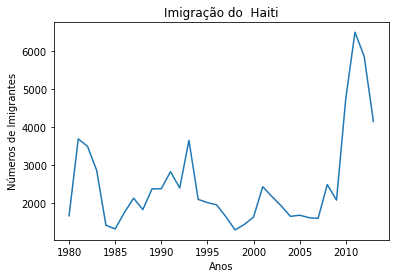

In [ ]:
haiti.index = haiti.index.map(int) # alterarando os valores de índice do Haiti para digitar inteiro para plotagem
haiti.plot(kind='line')

plt.title('Imigração do  Haiti')
plt.ylabel('Números de Imigrantes')
plt.xlabel('Anos')

plt.show() 

**Notoriamente número de imigrantes do Haiti teve o seu ápice em 2010, quando o Canadá intensificou seus esforços para acolher refugiados do Haiti**

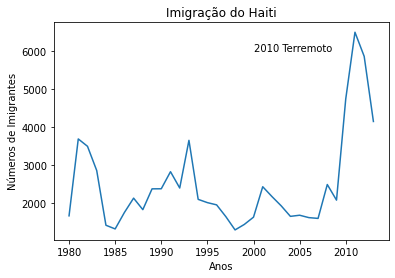

In [ ]:
haiti.plot(kind='line')

plt.title('Imigração do Haiti')
plt.ylabel('Números de Imigrantes')
plt.xlabel('Anos')
plt.text(2000, 6000, '2010 Terremoto') 

plt.show() 

Acrescentei o texto (2010 terremoto) para obter uma melhor visualização


# Biblioteca folium 

Irei utilizar uma biblioteca de visualização de dados muito interessante
em Python, que é Folium. Folium é uma poderosa biblioteca de visualização de dados , foi construída principalmente para ajudar as pessoas a visualizar dados geoespaciais. Com Folium, você pode criar um mapa de qualquer local do mundo, desde que conheça seus valores de latitude e longitude. Você também pode criar  mapas de diferentes estilos como mapa de nível de rua, mapa de Stamen Toner e alguns outros .



In [ ]:
#definindo o mapa mundi
world_map = folium.Map()
#exibir mapa 
world_map

In [ ]:
#definindo o mapa centrado no Canadá com um nível de zoom baixo
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)
world_map

In [ ]:
# criando um mapa Stamen Toner do mundo centrado no Canadá
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')
world_map

### B. Stamen Mapas de Terreno

São mapas que apresentam sombreamento de colinas e cores de vegetação natural. Eles exibem rotulagem avançada e generalização de linhas de mão em estradas de pista dupla.

In [ ]:
#criando um mapa Stamen Toner  centrado no Canadá
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')
world_map